SMS Spam Collection v.1
-------------------------

1. DESCRIPTION
--------------

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

1.1. Compilation
----------------

This corpus has been collected from free or free for research sources at the Web:

- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available at http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf
- A subset of 3,375 SMS ham messages of the NUS SMS Corpus (NSC), which is a corpus of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/
- The amount of 1,002 SMS ham messages and 322 spam messages extracted from the SMS Spam Corpus v.0.1 Big created by José María Gómez Hidalgo and public available at: http://www.esp.uem.es/jmgomez/smsspamcorpus/


1.2. Statistics
---------------

There is one collection:

- The SMS Spam Collection v.1 (text file: smsspamcollection) has a total of 4,827 SMS legitimate messages (86.6%) and a total of 747 (13.4%) spam messages.


1.3. Format
-----------

The files contain one message per line. Each line is composed by two columns: one with label (ham or spam) and other with the raw text. Here are some examples:

ham   What you doing?how are you?
ham   Ok lar... Joking wif u oni...
ham   dun say so early hor... U c already then say...
ham   MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham   Siva is in hostel aha:-.
ham   Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam   FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam   Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam   URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: messages are not chronologically sorted.


2. USAGE
--------

We offer a comprehensive study of this corpus in the following paper that is under review. This work presents a number of statistics, studies and baseline results for several machine learning methods.

[1] Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (ACM DOCENG'11), Mountain View, CA, USA, 2011. (Under review)


3. ABOUT
--------

The corpus has been collected by Tiago Agostinho de Almeida (http://www.dt.fee.unicamp.br/~tiago) and José María Gómez Hidalgo (http://www.esp.uem.es/jmgomez).

We would like to thank Dr. Min-Yen Kan (http://www.comp.nus.edu.sg/~kanmy/) and his team for making the NUS SMS Corpus available. See: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/. He is currently collecting a bigger SMS corpus at: http://wing.comp.nus.edu.sg:8080/SMSCorpus/

4. LICENSE/DISCLAIMER
---------------------

We would appreciate if:

- In case you find this corpus useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.
- Send us a message to tiago@dt.fee.unicamp.br in case you make use of the corpus.

The SMS Spam Collection v.1 is provided for free and with no limitations excepting:

1. Tiago Agostinho de Almeida and José María Gómez Hidalgo hold the copyrigth (c) for the SMS Spam Collection v.1.

2. No Warranty/Use At Your Risk. THE CORPUS IS MADE AT NO CHARGE. ACCORDINGLY, THE CORPUS IS PROVIDED `AS IS,' WITHOUT WARRANTY OF ANY KIND, INCLUDING WITHOUT LIMITATION THE WARRANTIES THAT THEY ARE MERCHANTABLE, FIT FOR A PARTICULAR PURPOSE OR NON-INFRINGING. YOU ARE SOLELY RESPONSIBLE FOR YOUR USE, DISTRIBUTION, MODIFICATION, REPRODUCTION AND PUBLICATION OF THE CORPUS AND ANY DERIVATIVE WORKS THEREOF BY YOU AND ANY OF YOUR SUBLICENSEES (COLLECTIVELY, `YOUR CORPUS USE'). THE ENTIRE RISK AS TO YOUR CORPUS USE IS BORNE BY YOU. YOU AGREE TO INDEMNIFY AND HOLD THE COPYRIGHT HOLDERS, AND THEIR AFFILIATES HARMLESS FROM ANY CLAIMS ARISING FROM OR RELATING TO YOUR CORPUS USE.

3. Limitation of Liability. IN NO EVENT SHALL THE COPYRIGHT HOLDERS OR THEIR AFFILIATES, OR THE CORPUS CONTRIBUTING EDITORS, BE LIABLE FOR ANY INDIRECT, SPECIAL, INCIDENTAL OR CONSEQUENTIAL DAMAGES, INCLUDING, WITHOUT LIMITATION, DAMAGES FOR LOSS OF GOODWILL OR ANY AND ALL OTHER COMMERCIAL DAMAGES OR LOSSES, EVEN IF ADVISED OF THE POSSIBILITY THEREOF, AND REGARDLESS OF WHETHER ANY CLAIM IS BASED UPON ANY CONTRACT, TORT OR OTHER LEGAL OR EQUITABLE THEORY, RELATING OR ARISING FROM THE CORPUS, YOUR CORPUS USE OR THIS LICENSE AGREEMENT.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets\\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df["Message"], df["Category"], random_state=42, test_size=0.2)

In [15]:
X_train[1]

'Ok lar... Joking wif u oni...'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

In [18]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
len(X_train_count.toarray()[1])

7701

In [25]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_count)
class_report = classification_report(y_pred=y_pred, y_true=y_test)
print(class_report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [28]:
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(conf_matrix)

[[966   0]
 [  9 140]]


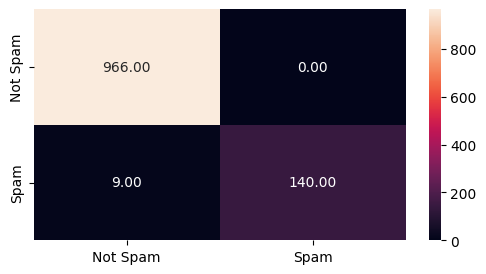

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True,  fmt=".2f", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.show()


In [35]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("count_vectorizer", CountVectorizer()),
    ("nb_classifier", MultinomialNB())
])

pipe.fit(X_train, y_train)

y_pred_pipe = pipe.predict(X_test)
rep = classification_report(y_pred=y_pred_pipe, y_true=y_test)
print(rep)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

